In [1]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

In [2]:
df = pd.read_csv('/kaggle/input/best-songs-on-spotify-for-every-year-2000-2023/Best Songs on Spotify from 2000-2023.csv', sep=';')
df.head()

,title,artist,top genre,year,bpm,energy,danceability,dB,liveness,valence,duration,acousticness,speechiness,popularity
0,Flowers,Miley Cyrus,pop,2023,118,68,71,-4,3,65,200,6,7,98
1,Cupid - Twin Ver.,FIFTY FIFTY,k-pop girl group,2023,120,59,78,-8,35,73,174,44,3,97
2,BESO,ROSALÍA,pop,2023,95,64,77,-7,17,53,195,74,14,96
3,Boy's a liar Pt. 2,PinkPantheress,bronx drill,2023,133,81,70,-8,25,86,131,25,5,96
4,Creepin' (with The Weeknd & 21 Savage),Metro Boomin,rap,2022,98,62,72,-6,8,17,222,42,5,96


# EDA

Information about dataset: [link](http://organizeyourmusic.playlistmachinery.com/)
* Genre - the genre of the track
* Year - the release year of the recording. Note that due to vagaries of * releases, re-releases, re-issues and general madness, sometimes the release years are not what you'd expect.
* Beats Per Minute (BPM) - The tempo of the song.
* Energy - The energy of a song - the higher the value, the more energtic. song
* Danceability - The higher the value, the easier it is to dance to this song.
* Loudness (dB) - The higher the value, the louder the song.
* Liveness - The higher the value, the more likely the song is a live recording.
* Valence - The higher the value, the more positive mood for the song.
* Length - The duration of the song.
* Acousticness - The higher the value the more acoustic the song is.
* Speechiness - The higher the value the more spoken word the song contains.
* Popularity - The higher the value the more popular the song is.
* Duration - The length of the song.

In [3]:
print(f'Shape of the dataset: {df.shape}')
print(f'Number of NaNs values: {df.isna().sum().sum()}')
print(f'Data types: {df.dtypes.value_counts()}')

Shape of the dataset: (2385, 14)
Number of NaNs values: 0
Data types: int64     11
object     3
dtype: int64


Dataset is made from top 100 songs for every year on Spotify, starting from 2000 until 2023.

In [4]:
df['year'].value_counts()

2012    126
2016    122
2019    121
2018    115
2001    113
2005    110
2010    109
2017    109
2015    109
2014    107
2021    103
2011    100
2008     98
2006     96
2004     94
2002     93
2007     93
2009     91
2013     86
2020     83
2003     82
2000     74
2022     58
2023     46
1999     41
1997      3
1985      1
1996      1
1998      1
Name: year, dtype: int64

However, there is no rule to 100 songs per year, and this number varies a lot. Especially with respect to the old songs.

### Top 15 songs based on popularity

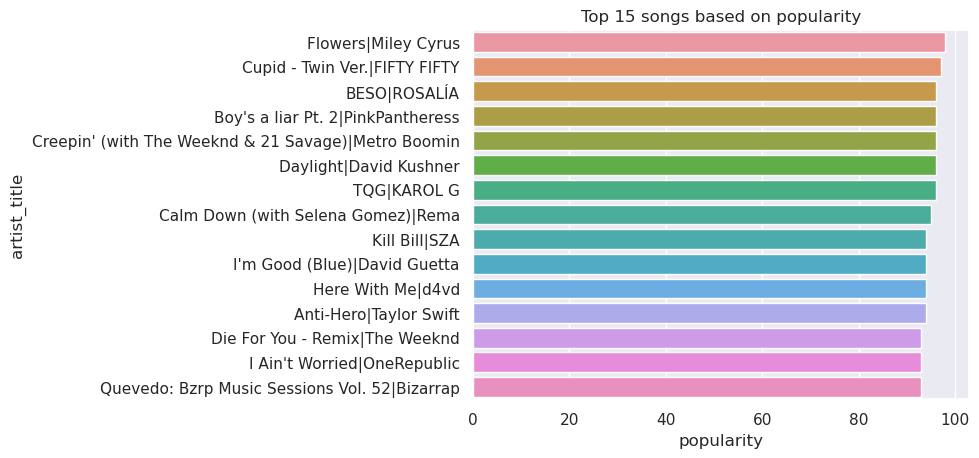

In [5]:
tmp_df = df[['title','artist', 'popularity']].sort_values(by='popularity', ascending=False)
tmp_df['artist_title'] = tmp_df['title'] + '|' + tmp_df['artist']
sns.barplot(data=tmp_df.iloc[:15], y='artist_title', x='popularity')
plt.title('Top 15 songs based on popularity')
plt.show()

### Top 25 artists

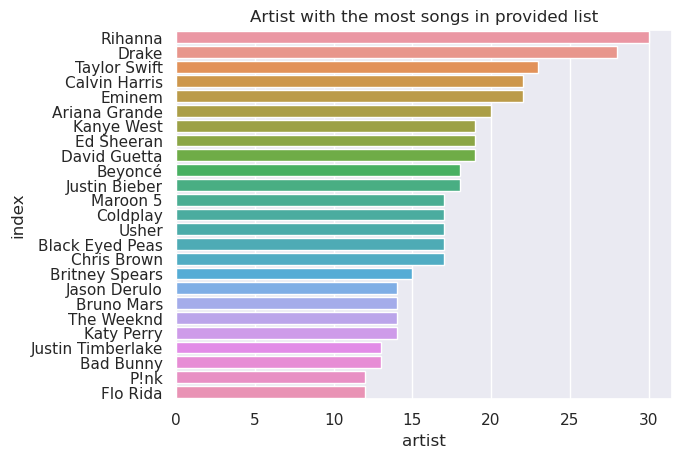

In [6]:
tmp_df = df['artist'].value_counts().reset_index()[:25]
sns.barplot(data=tmp_df, y='index', x='artist')
plt.title('Artist with the most songs in provided list')
plt.show()

### Average popularity each year

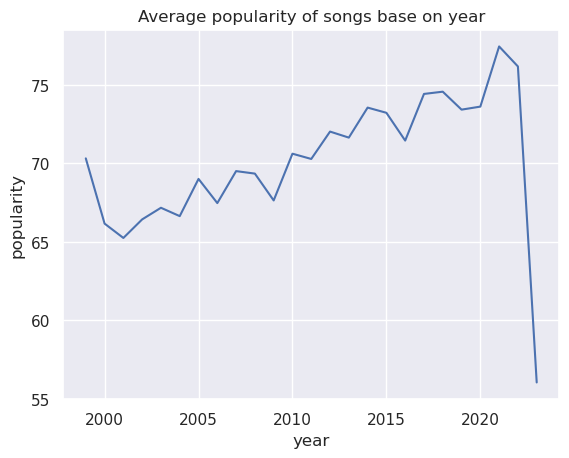

In [7]:
tmp_df = df.groupby('year')['popularity'].mean().reset_index()
plt.title('Average popularity of songs base on year')
sns.lineplot(tmp_df[tmp_df['year'] > 1998], x='year', y='popularity')
plt.show()

There were also a strong trend around 1998 - 2022 of stedy grow in average popularity,  but the 2023 year broke that trend. It definitely should be looked at. It's important to keep in mind that the data is published before the end of 2023, so the final outcome might be different. Songs before 1998 are ignored, because there was not enough datapoints for each year to give usefull informations.

### Exploring distributions of informations about songs

In [8]:
tmp_cols =  ['bpm', 'energy', 'danceability ', 'dB', 'liveness', 
             'valence', 'duration', 'acousticness', 'speechiness ', 'popularity']

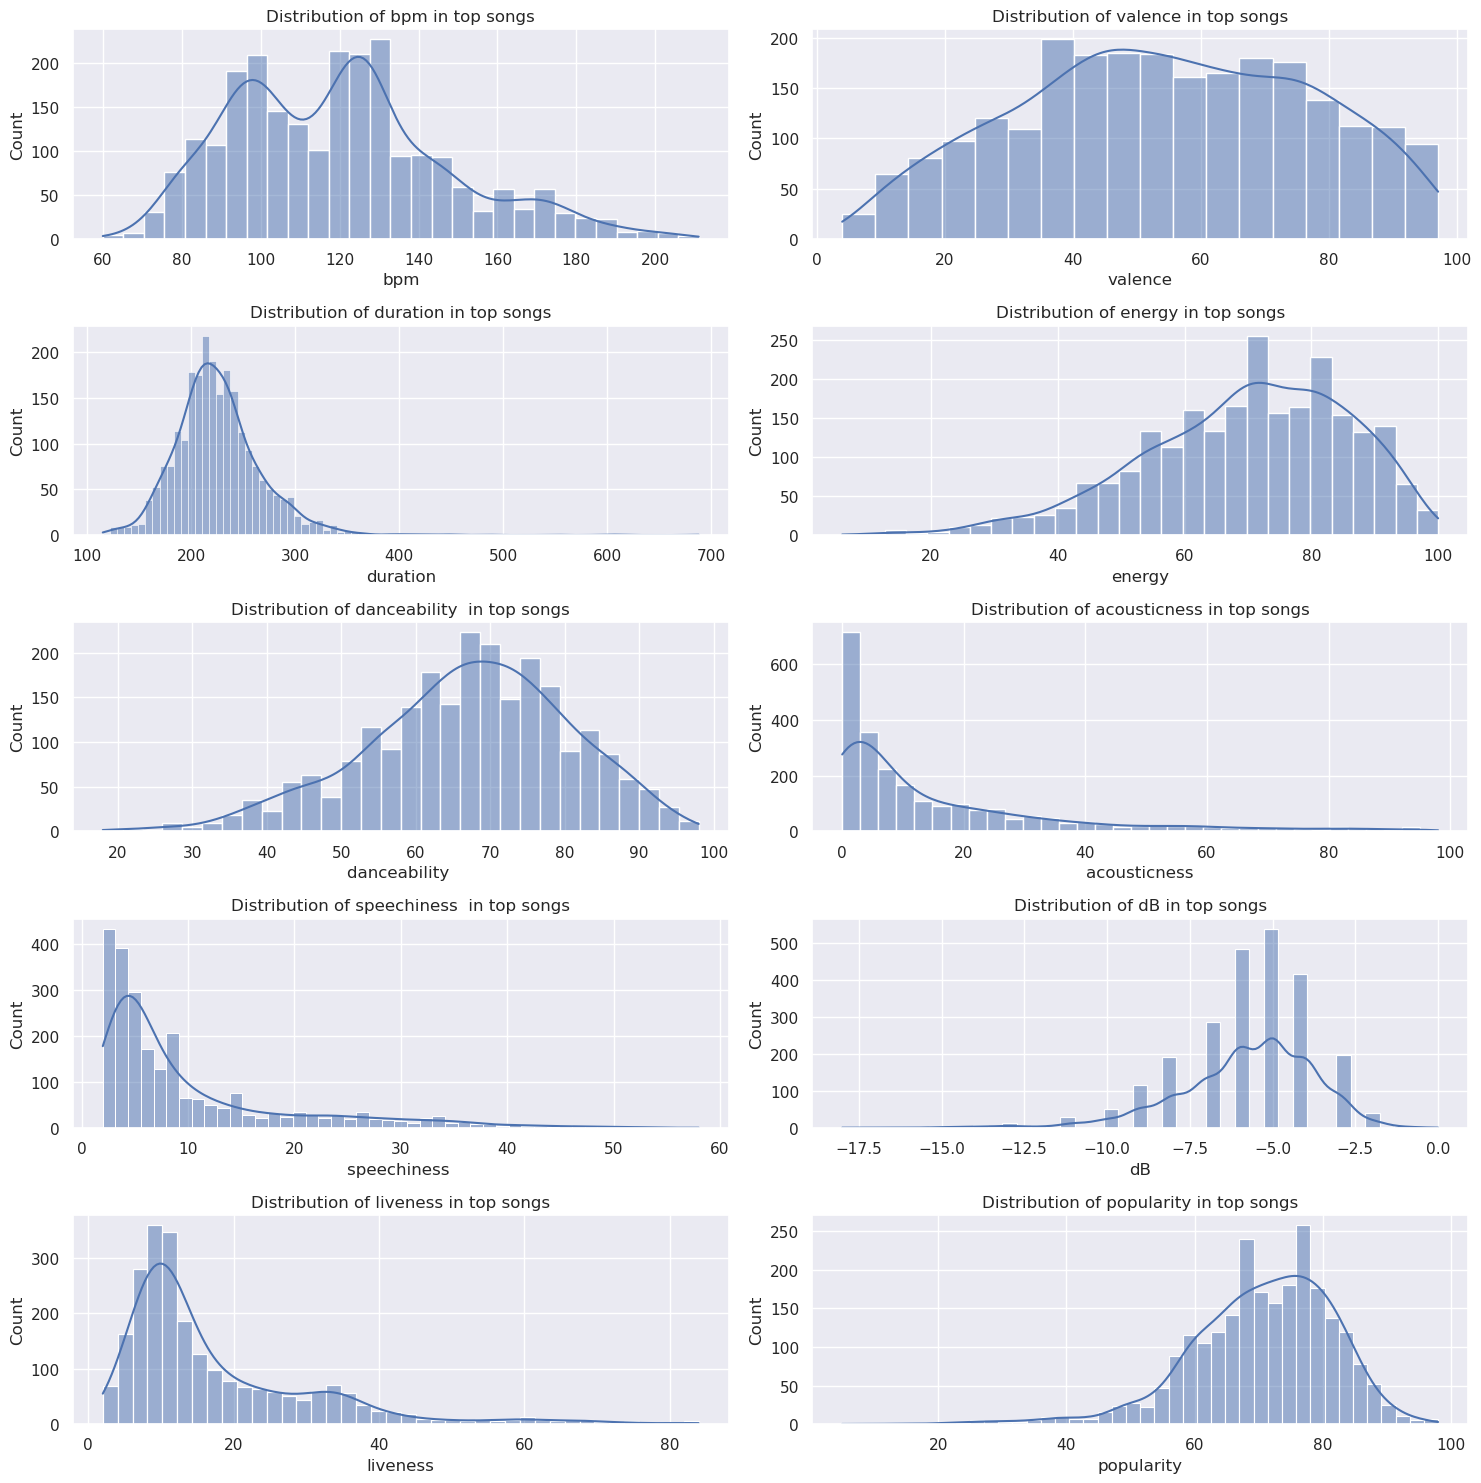

In [9]:
fig, axes = plt.subplots(5, 2)
fig.set_figheight(15)
fig.set_figwidth(15)
for count, col in enumerate(tmp_cols):
    sns.histplot(df[col], kde=True, ax=axes[count%5][count % 2])
    axes[count%5][count % 2].title.set_text(f'Distribution of {col} in top songs')
    
plt.tight_layout()
plt.show()

There is a lot information hidden in distributions.

* songs in this list have high danceability 
* most of them are not a live recording (liveness)
* there are mostly few spoken words in songs (speechiness)
* top songs usually have high danceability and energy
* bmp in range 90 - 130 is the most common
* durability of the songs are mostly between 3-4minutes
* there are no correlation between mood of the song and it occurance, all type of songs are almost equally frequent (less positive are a bit less frequent)

**This information gives strong indication that there is possibility to train a model which could achive decent results in predicting popularity of the song in the dataset based on the plotted features.**

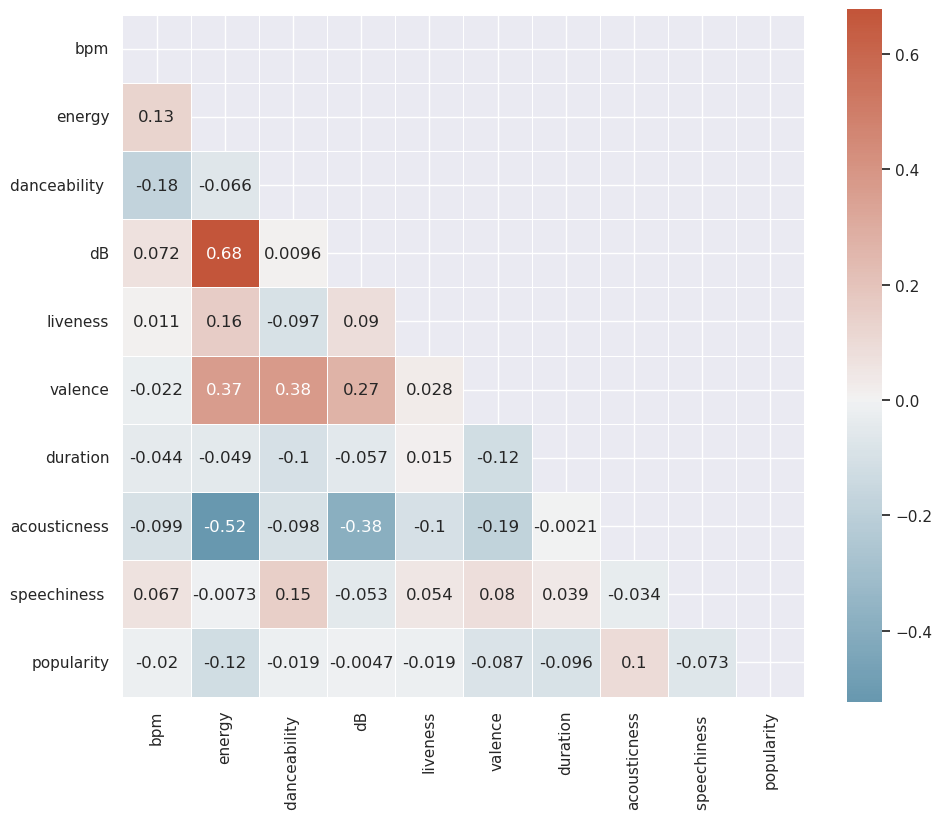

In [10]:
corr = df[tmp_cols].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, annot=True)
plt.show()

There are a few correlation, but they are a bit obvious. For example, with growing energy of the songs it is expected to be less accousticness and a bit lower o dB.